In [24]:
import numpy as np# type: ignore

In [47]:
# Euclidean
row1 = [5, 6]
row2 = [1, 2]
def euclidean_distance(p, q):
    x = np.array(p)
    y = np.array(q)
    return np.sqrt(np.sum((x-y)**2))

#Calculate distance
euclidean = euclidean_distance(row1, row2)
print(euclidean)



5.656854249492381


In [46]:
# Manhatton
row1 = [5, 6]
row2 = [1, 2]
def manhatton_distance(p, q):
    x = np.array(p)
    y = np.array(q)
    return np.abs(np.sum((x-y)))

manhatton = manhatton_distance(row1, row2)

print(manhatton)

8


In [49]:
# Minikowski
row1 = [5, 6]
row2 = [1, 2]
def minkowski_distance(p, q, r):
    x = np.array(p)
    y = np.array(q)
    return np.sum(np.abs(x-y)**r)**(1/r)

minkowski = minkowski_distance(row1, row2, 3)
print(minkowski)

5.039684199579492


In [44]:
from scipy.spatial import distance# type: ignore

row1 = [10, 20, 6, 9, 25]
row2 = [8, 12, 18, 8, 33]

# Calculate distance
euclidean = distance.euclidean(row1, row2)
manhatton = distance.cityblock(row1, row2)
minkowski = distance.minkowski(row1, row2, 3)

print('Euclidean: ', euclidean)
print('Manhatton: ', manhatton)
print('Minkowski', minkowski)    

Euclidean:  16.64331697709324
Manhatton:  31
Minkowski 14.02885206366679


x train:  (120, 4) x test:  (30, 4)
y train:  (120,) y test:  (30,)
Predict result:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Accuracy:  1.0
Classification report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



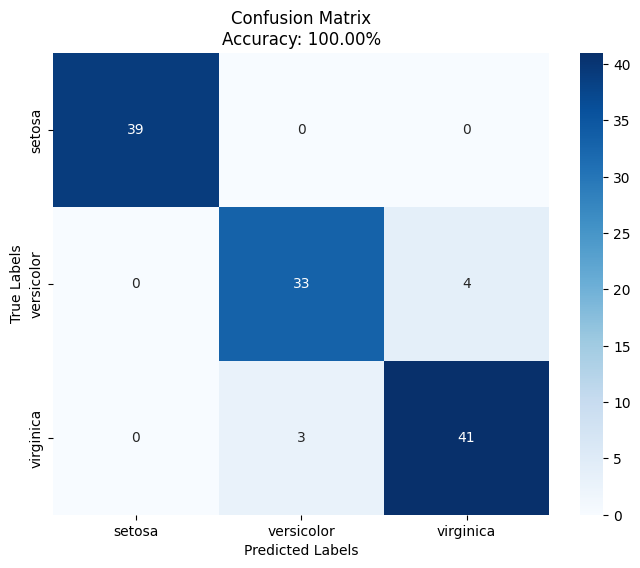

In [29]:
from sklearn import datasets# type: ignore
from sklearn.model_selection import  train_test_split# type: ignore
from sklearn.neighbors import  KNeighborsClassifier# type: ignore
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score# type: ignore  
import seaborn as sns# type: ignore
import matplotlib.pyplot as plt# type: ignore

# 1. Load dataset
dataset = datasets.load_iris()

x = dataset['data']
y = dataset['target']


# 2. Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)   
print('x train: ', x_train.shape, 'x test: ', x_test.shape) 
print('y train: ', y_train.shape, 'y test: ', y_test.shape)

# 3. Build model
knn = KNeighborsClassifier(n_neighbors=18)

# 4. Train model
knn.fit(x_train, y_train)

# 5. Make predictions
y_pred = knn.predict(x_test)
print('Predict result: ', y_pred)

# 6. Performance measurement
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred, target_names=dataset['target_names']))
plt.figure(figsize=(8, 6))
sns.heatmap(
    cn, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=dataset['target_names'], 
    yticklabels=dataset['target_names']
)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



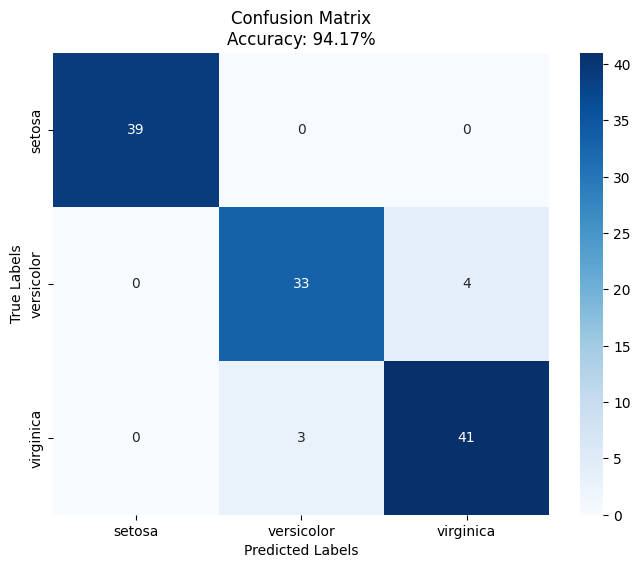

In [30]:
import seaborn as sns# type: ignore
import matplotlib.pyplot as plt# type: ignore
from sklearn.metrics import confusion_matrix, accuracy_score# type: ignore
from sklearn.model_selection import cross_val_predict# type: ignore


y_train_pred = cross_val_predict(knn, x_train, y_train, cv=3)

cn = confusion_matrix(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cn, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=dataset['target_names'], 
    yticklabels=dataset['target_names']
)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy:  0.7824675324675324


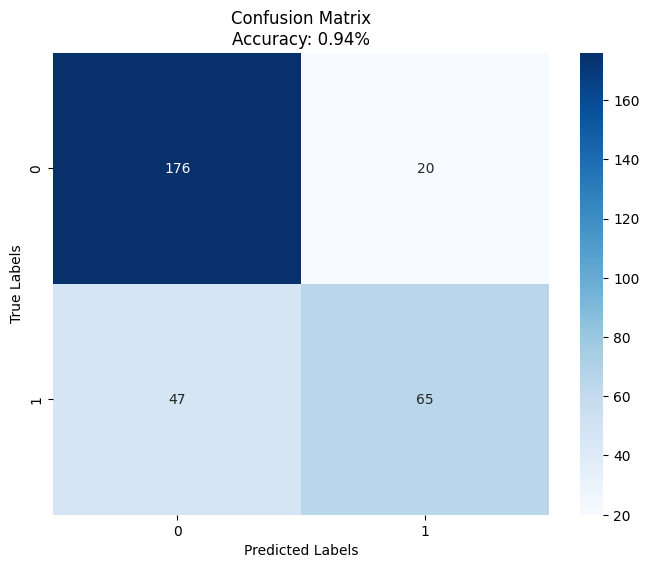

In [31]:
import pandas as pd# type: ignore
from sklearn.model_selection import  train_test_split# type: ignore
from sklearn.neighbors import  KNeighborsClassifier# type: ignore

##[Exercise 4] Predicting diabetes by KNN

# 1. Read dataset -> diabetes.csv
dataset = pd.read_csv('diabetes2.csv')

dataset['BloodPressure2'] =  dataset['BloodPressure'] * 2
dataset['Pregnancies2'] =  dataset['Pregnancies'] * 2

features = ['Pregnancies', 'Glucose', 'BloodPressure',
       'BMI', 'BloodPressure2', 'Pregnancies2','Age']

# 2. Prepare dataset
x = dataset[features]
y = dataset['Outcome'].values

# 3. Split dataset 60/40% train = 60% test = 40%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

# 4. Train model --> find K value
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)


# 5. Prediction
y_pred = knn.predict(x_test)

# 6. Performance measurement
# Accuracy, confusion matrix
print('Accuracy: ', accuracy_score(y_test, y_pred))
cn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cn, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    # xticklabels=dataset[], 
    # yticklabels=dataset[]
)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}%')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 79.22


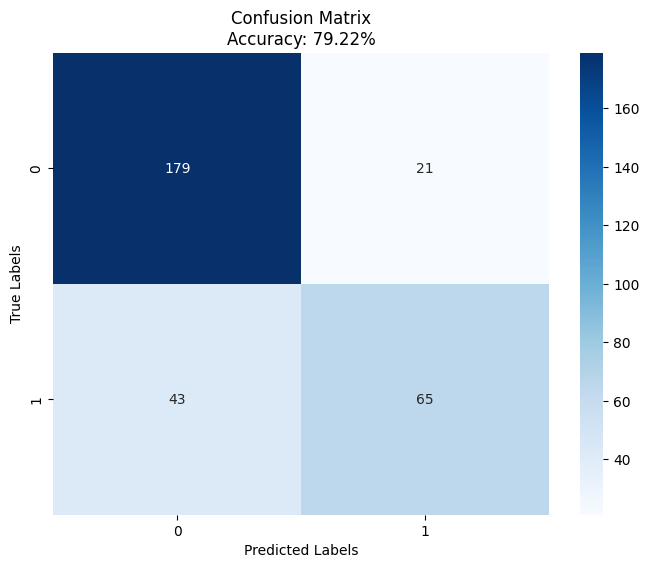

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1. Read dataset
data_set = pd.read_csv('./diabetes2.csv')

#2. Prepare dataset 
feature_cols = ['Pregnancies','BMI','Age','Glucose']
x = data_set[feature_cols].fillna(0).values
y = data_set['Outcome']

#3. Split dataset #60/40
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1000)

#4. Train model 
k = 18
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

#5. Predictions 
y_prediction = knn.predict(x_test)


print
#6. Prrformance measurement 
#Accuracy, confusion matrix
accuracy = accuracy_score(y_test, y_prediction) * 100
print(f"Accuracy: {accuracy:.2f}")

cn = confusion_matrix(y_test, y_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cn, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    # xticklabels=dataset[], 
    # yticklabels=dataset[]
)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}%')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()